In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import missingno as msg
import math
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('deliveries.csv')
df1 = pd.read_csv('matches.csv')

In [4]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [7]:
df1.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

# Ques 1 - win ?

In [8]:
both_team = df1[((df1['team1'] == 'Mumbai Indians') & (df1['team2'] == 'Rajasthan Royals')) | ((df1['team1'] == 'Rajasthan Royals') & (df1['team2'] == 'Mumbai Indians'))]
both_team

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
85,86,2008,Mumbai,2008-05-07,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,7,A Nehra,Dr DY Patil Sports Academy,DJ Harper,RE Koertzen,NaN
112,113,2008,Jaipur,2008-05-26,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,5,Sohail Tanvir,Sawai Mansingh Stadium,BF Bowden,K Hariharan,NaN
159,160,2009,Durban,2009-05-14,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Rajasthan Royals,2,0,SK Warne,Kingsmead,BR Doctrove,DJ Harper,NaN
175,176,2010,Mumbai,2010-03-13,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Mumbai Indians,4,0,YK Pathan,Brabourne Stadium,RE Koertzen,RB Tiffin,NaN
218,219,2010,Jaipur,2010-04-11,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Mumbai Indians,37,0,SR Tendulkar,Sawai Mansingh Stadium,BR Doctrove,SK Tarapore,NaN
266,267,2011,Jaipur,2011-04-29,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,J Botha,Sawai Mansingh Stadium,Asad Rauf,SK Tarapore,NaN
298,299,2011,Mumbai,2011-05-20,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel,NaN
318,319,2012,Mumbai,2012-04-11,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Mumbai Indians,27,0,KA Pollard,Wankhede Stadium,Aleem Dar,BNJ Oxenford,NaN
376,377,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin,NaN
402,403,2013,Jaipur,2013-04-17,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Rajasthan Royals,87,0,AM Rahane,Sawai Mansingh Stadium,Aleem Dar,C Shamshuddin,NaN


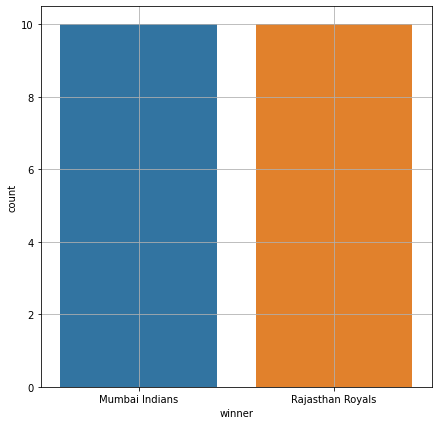

Rajasthan Royals    10
Mumbai Indians      10
Name: winner, dtype: int64


In [10]:
plt.figure(figsize  =(7,7))
sb.countplot(both_team['winner'])
plt.grid()
plt.show()
print(both_team['winner'].value_counts())

In [13]:
# last 3 seasons
recent = both_team[both_team['season'] >= 2017]

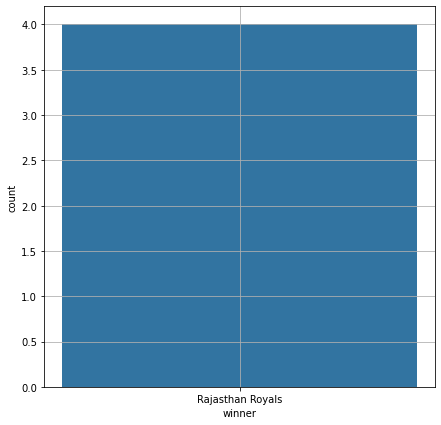

Rajasthan Royals    4
Name: winner, dtype: int64


In [14]:
# last 3 season
plt.figure(figsize  =(7,7))
sb.countplot(recent['winner'])
plt.grid()
plt.show()
print(recent['winner'].value_counts())

In [15]:
recent

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
656,7914,2018,Jaipur,22/04/18,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,3,J Archer,Sawai Mansingh Stadium,Rod Tucker,K Ananthapadmanabhan,Nitin Menon
682,7940,2018,Mumbai,13/05/18,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,JC Buttler,Wankhede Stadium,Nitin Menon,S Ravi,C Shamshuddin
722,11318,2019,Mumbai,13/04/19,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,JC Buttler,Wankhede Stadium,Nitin Menon,Nanda Kishore,Marais Erasmus
731,11327,2019,Jaipur,20/04/19,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,5,SPD Smith,Sawai Mansingh Stadium,S Ravi,Yeshwant Barde,O Nandan


In [20]:
both_team.groupby(['id', 'toss_decision' , 'toss_winner'])['winner'].count()

id     toss_decision  toss_winner     
86     field          Mumbai Indians      1
113    field          Rajasthan Royals    1
160    bat            Rajasthan Royals    1
176    bat            Mumbai Indians      1
219    field          Rajasthan Royals    1
267    field          Rajasthan Royals    1
299    bat            Mumbai Indians      1
319    field          Rajasthan Royals    1
377    bat            Rajasthan Royals    1
403    bat            Rajasthan Royals    1
447    field          Rajasthan Royals    1
456    bat            Rajasthan Royals    1
501    bat            Mumbai Indians      1
513    field          Mumbai Indians      1
526    bat            Mumbai Indians      1
549    field          Rajasthan Royals    1
7914   bat            Mumbai Indians      1
7940   field          Rajasthan Royals    1
11318  field          Rajasthan Royals    1
11327  field          Rajasthan Royals    1
Name: winner, dtype: int64

In [18]:
recent.groupby(['id', 'toss_decision' , 'toss_winner'])['winner'].count()

id     toss_decision  toss_winner     
7914   bat            Mumbai Indians      1
7940   field          Rajasthan Royals    1
11318  field          Rajasthan Royals    1
11327  field          Rajasthan Royals    1
Name: winner, dtype: int64

# Take aways : 
### 1 - Acc to all matches , both have equal wins
### 2 - Acc to last 3 season , RR have won all the 3 matches
### 3 - But ,this year the situation is different ,and MI is playing very strong
### 4 - Last face-off between RR and MI resulted in MI win
### 5 - MI has won it's last non-RR match
### 6 - RR has won it's last non-MI match

# Ques 1 ans - MI

In [22]:
##########################################################################################################################################

# Ques 2 - BIS ?

In [151]:
rr_bat = main_df_team[main_df_team['batting_team'] == 'Rajasthan Royals']
rr_bat

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
20024,86,1,Rajasthan Royals,Mumbai Indians,1,1,GC Smith,SA Asnodkar,SM Pollock,0,...,0,0,0,0,0,0,0,0,NaN,NaN
20025,86,1,Rajasthan Royals,Mumbai Indians,1,2,GC Smith,SA Asnodkar,SM Pollock,0,...,0,0,0,0,1,0,1,0,NaN,NaN
20026,86,1,Rajasthan Royals,Mumbai Indians,1,3,SA Asnodkar,GC Smith,SM Pollock,0,...,0,0,0,0,1,0,1,0,NaN,NaN
20027,86,1,Rajasthan Royals,Mumbai Indians,1,4,GC Smith,SA Asnodkar,SM Pollock,0,...,0,0,0,0,0,0,0,0,NaN,NaN
20028,86,1,Rajasthan Royals,Mumbai Indians,1,5,GC Smith,SA Asnodkar,SM Pollock,0,...,0,0,0,0,1,0,1,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173493,11327,2,Rajasthan Royals,Mumbai Indians,19,3,SPD Smith,STR Binny,JJ Bumrah,0,...,0,0,0,0,1,0,1,0,NaN,NaN
173494,11327,2,Rajasthan Royals,Mumbai Indians,19,4,STR Binny,SPD Smith,JJ Bumrah,0,...,0,0,0,0,1,0,1,0,NaN,NaN
173495,11327,2,Rajasthan Royals,Mumbai Indians,19,5,SPD Smith,STR Binny,JJ Bumrah,0,...,0,0,0,0,1,0,1,0,NaN,NaN
173496,11327,2,Rajasthan Royals,Mumbai Indians,19,6,STR Binny,SPD Smith,JJ Bumrah,0,...,0,0,0,0,1,0,1,0,NaN,NaN


In [191]:
match = rr_bat['match_id'].unique()
batsman = rr_bat['batsman'].unique()

In [220]:
ma , bat , running_runs = [],[],[]

for i in match:
    ma.append(i)
    m = rr_bat[rr_bat['match_id'] == i]
    m = m.reset_index(drop = True)
    for j in batsman:
        
        w = 0
        b = m[m['batsman'] == j]
        b = b.reset_index(drop =True)
        for k in range(len(b)):
            if b.loc[k , 'batsman_runs'] == 1:
                w  = w+1
            elif b.loc[k , 'batsman_runs'] == 2:
                w = w+2
            elif b.loc[k , 'batsman_runs'] == 3:
                w = w+3
        
        running_runs.append(w)
        bat.append(j)
                

In [221]:
ma

[86,
 113,
 160,
 176,
 219,
 267,
 299,
 319,
 377,
 403,
 447,
 456,
 501,
 513,
 526,
 549,
 7914,
 7940,
 11318,
 11327]

In [222]:
bat

['GC Smith',
 'SA Asnodkar',
 'YK Pathan',
 'SR Watson',
 'M Kaif',
 'RA Jadeja',
 'SK Warne',
 'Sohail Tanvir',
 'M Rawat',
 'SK Trivedi',
 'MM Patel',
 'Kamran Akmal',
 'Niraj Patel',
 'RJ Quiney',
 'SD Chitnis',
 'NV Ojha',
 'J Botha',
 'AA Jhunjhunwala',
 'P Dogra',
 'AD Mascarenhas',
 'A Uniyal',
 'MJ Lumb',
 'FY Fazal',
 'AC Voges',
 'AS Raut',
 'AP Dole',
 'R Dravid',
 'LRPL Taylor',
 'AL Menaria',
 'AM Rahane',
 'SP Goswami',
 'OA Shah',
 'KK Cooper',
 'AA Chavan',
 'A Singh',
 'GB Hogg',
 'STR Binny',
 'DH Yagnik',
 'BJ Hodge',
 'JP Faulkner',
 'SV Samson',
 'KK Nair',
 'UBT Chand',
 'Ankit Sharma',
 'R Bhatia',
 'SPD Smith',
 'DJ Hooda',
 'TG Southee',
 'J Theron',
 'RA Tripathi',
 'BA Stokes',
 'JC Buttler',
 'J Archer',
 'H Klaasen',
 'K Gowtham',
 'D Short',
 'L Livingstone',
 'S Gopal',
 'R Parag',
 'A Turner',
 'GC Smith',
 'SA Asnodkar',
 'YK Pathan',
 'SR Watson',
 'M Kaif',
 'RA Jadeja',
 'SK Warne',
 'Sohail Tanvir',
 'M Rawat',
 'SK Trivedi',
 'MM Patel',
 'Kamran A

In [223]:
running_runs

[5,
 21,
 1,
 10,
 4,
 0,
 3,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 2,
 6,
 12,
 17,
 0,
 0,
 0,
 0,
 0,
 2,
 26,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7,
 0,
 5,
 0,
 0,
 20,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 19,
 2,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 16,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 4,
 21,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 1,
 0,
 0,
 0,
 0

In [224]:
len(bat) , len(running_runs)

(1200, 1200)

In [225]:
# bound_runs , batting_runs , running_runs

bound_runs = pd.DataFrame(list(zip(bat, running_runs)), 
               columns =['bat', 'batting_runs']) 
bound_runs

w,bo = [],[]
b = bound_runs['bat'].unique()
for i in b:
    B = bound_runs[bound_runs['bat'] == i]
    B =B.reset_index(drop =True)
    w.append(B['batting_runs'].sum())
    bo.append(b)


running_runs = pd.DataFrame(list(zip(bo[0], w)), 
               columns =['bat', 'running_runs']) 
running_runs


,bat,running_runs
0,GC Smith,22
1,SA Asnodkar,30
2,YK Pathan,28
3,SR Watson,86
4,M Kaif,16
5,RA Jadeja,37
6,SK Warne,4
7,Sohail Tanvir,2
8,M Rawat,1
9,SK Trivedi,6


In [227]:
batting_runs

,bat,batting_runs
0,GC Smith,50
1,SA Asnodkar,56
2,YK Pathan,130
3,SR Watson,308
4,M Kaif,16
5,RA Jadeja,65
6,SK Warne,8
7,Sohail Tanvir,6
8,M Rawat,1
9,SK Trivedi,6


In [229]:
running_run

[5,
 21,
 1,
 10,
 4,
 0,
 3,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 2,
 6,
 12,
 17,
 0,
 0,
 0,
 0,
 0,
 2,
 26,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7,
 0,
 5,
 0,
 0,
 20,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 19,
 2,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 16,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 4,
 21,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 1,
 0,
 0,
 0,
 0

In [226]:
BIS_RR = pd.merge(batting_runs , bound_runs , how= 'inner' , on = 'bat')
BIS_RR

,bat,batting_runs_x,batting_runs_y
0,GC Smith,50,5
1,GC Smith,50,0
2,GC Smith,50,7
3,GC Smith,50,10
4,GC Smith,50,0
...,...,...,...
1195,A Turner,0,0
1196,A Turner,0,0
1197,A Turner,0,0
1198,A Turner,0,0


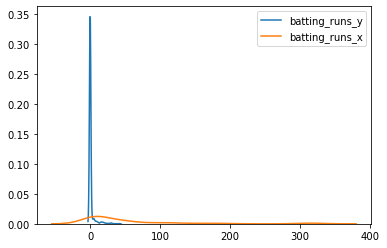

In [232]:
sb.kdeplot(BIS_RR['batting_runs_y'])
sb.kdeplot(BIS_RR['batting_runs_x'])


# Ques 2 ans - (Ishan Kishan or Kieron Pollard)

In [24]:
################################################################################################################################

# Ques 3 - Best (Runs by Boundary / Total Runs) ratio

In [10]:
main_df_team = df[(((df['batting_team'] == 'Rajasthan Royals')  & (df['bowling_team'] == 'Mumbai Indians')) | ((df['batting_team'] == 'Mumbai Indians')  & (df['bowling_team'] == 'Rajasthan Royals')))]
main_df_team

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
20024,86,1,Rajasthan Royals,Mumbai Indians,1,1,GC Smith,SA Asnodkar,SM Pollock,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
20025,86,1,Rajasthan Royals,Mumbai Indians,1,2,GC Smith,SA Asnodkar,SM Pollock,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
20026,86,1,Rajasthan Royals,Mumbai Indians,1,3,SA Asnodkar,GC Smith,SM Pollock,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
20027,86,1,Rajasthan Royals,Mumbai Indians,1,4,GC Smith,SA Asnodkar,SM Pollock,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
20028,86,1,Rajasthan Royals,Mumbai Indians,1,5,GC Smith,SA Asnodkar,SM Pollock,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173493,11327,2,Rajasthan Royals,Mumbai Indians,19,3,SPD Smith,STR Binny,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173494,11327,2,Rajasthan Royals,Mumbai Indians,19,4,STR Binny,SPD Smith,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173495,11327,2,Rajasthan Royals,Mumbai Indians,19,5,SPD Smith,STR Binny,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173496,11327,2,Rajasthan Royals,Mumbai Indians,19,6,STR Binny,SPD Smith,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [26]:
mi_bat = main_df_team[main_df_team['batting_team'] == 'Mumbai Indians']
mi_bat.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
20127,86,2,Mumbai Indians,Rajasthan Royals,1,1,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
20128,86,2,Mumbai Indians,Rajasthan Royals,1,2,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
20129,86,2,Mumbai Indians,Rajasthan Royals,1,3,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
20130,86,2,Mumbai Indians,Rajasthan Royals,1,4,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
20131,86,2,Mumbai Indians,Rajasthan Royals,1,5,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [38]:
pivot = mi_bat.pivot_table(index = ['match_id'] , values = ['batsman_runs' , 'ball' ] , aggfunc=['sum' , 'count'])
pivot

sum              count             
         ball batsman_runs  ball batsman_runs
match_id                                     
86        364           92    99           99
113       469          132   127          127
160       471          125   127          127
176       487          196   129          129
219       477          162   128          128
267       449           87   124          124
299       434          128   122          122
319       420          191   120          120
377       447          145   118          118
403       402           85   113          113
447       448          159   124          124
456       442          159   123          123
501       441          172   123          123
513       332          188    92           92
526       427          159   121          121
549       455          178   125          125
7914      449          167   124          124
7940      470          168   127          127
11318     442          187   123          123
11327     455          162   125          125

In [39]:
pivot = pd.DataFrame(pivot.to_records())
pivot.head()

,match_id,"('sum', 'ball')","('sum', 'batsman_runs')","('count', 'ball')","('count', 'batsman_runs')"
0,86,364,92,99,99
1,113,469,132,127,127
2,160,471,125,127,127
3,176,487,196,129,129
4,219,477,162,128,128


In [41]:
mi_bat = mi_bat.reset_index(drop = True)

In [42]:
for i in range(len(mi_bat)):
    if mi_bat.loc[i , 'batsman_runs'] == 4:
        mi_bat.loc[i , 'boundary'] =4
    elif mi_bat.loc[i , 'batsman_runs'] == 6:
        mi_bat.loc[i , 'boundary'] = 6
    else:
        mi_bat.loc[i , 'boundary'] = 0
print('done')

done


In [46]:
mi_bat

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,boundary
0,86,2,Mumbai Indians,Rajasthan Royals,1,1,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,NaN,NaN,NaN,0.0
1,86,2,Mumbai Indians,Rajasthan Royals,1,2,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,NaN,NaN,NaN,0.0
2,86,2,Mumbai Indians,Rajasthan Royals,1,3,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,NaN,NaN,NaN,0.0
3,86,2,Mumbai Indians,Rajasthan Royals,1,4,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,1,1,NaN,NaN,NaN,0.0
4,86,2,Mumbai Indians,Rajasthan Royals,1,5,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409,11327,1,Mumbai Indians,Rajasthan Royals,20,2,KH Pandya,BCJ Cutting,J Archer,0,...,0,0,0,1,0,1,NaN,NaN,NaN,0.0
2410,11327,1,Mumbai Indians,Rajasthan Royals,20,3,BCJ Cutting,KH Pandya,J Archer,0,...,0,0,0,1,0,1,NaN,NaN,NaN,0.0
2411,11327,1,Mumbai Indians,Rajasthan Royals,20,4,KH Pandya,BCJ Cutting,J Archer,0,...,0,0,0,1,0,1,NaN,NaN,NaN,0.0
2412,11327,1,Mumbai Indians,Rajasthan Royals,20,5,BCJ Cutting,KH Pandya,J Archer,0,...,0,0,0,0,0,0,NaN,NaN,NaN,0.0


In [50]:
mi_bat.pivot_table(index = ['match_id'] , values=['boundary','batsman_runs','ball' ],aggfunc=['sum','count'])

sum                       count                      
         ball batsman_runs boundary  ball batsman_runs boundary
match_id                                                       
86        364           92     46.0    99           99       99
113       469          132     62.0   127          127      127
160       471          125     52.0   127          127      127
176       487          196    128.0   129          129      129
219       477          162     98.0   128          128      128
267       449           87     28.0   124          124      124
299       434          128     58.0   122          122      122
319       420          191    128.0   120          120      120
377       447          145     82.0   118          118      118
403       402           85     32.0   113          113      113
447       448          159     96.0   124          124      124
456       442          159     96.0   123          123      123
501       441          172    102.0   123          123      123
513       332          188    148.0    92           92       92
526       427          159    116.0   121          121      121
549       455          178    108.0   125          125      125
7914      449          167     94.0   124          124      124
7940      470          168    102.0   127          127      127
11318     442          187    110.0   123          123      123
11327     455          162     84.0   125          125      125

In [54]:
mi_bat.groupby(['match_id' , 'batsman','batsman_runs'])['boundary'].sum().sort_values(ascending = False)

match_id  batsman       batsman_runs
377       DR Smith      4               40.0
219       SR Tendulkar  4               40.0
513       CJ Anderson   4               36.0
                        6               36.0
447       AP Tare       4               32.0
                                        ... 
456       KD Karthik    1                0.0
                        2                0.0
          R Dhawan      0                0.0
          RG Sharma     0                0.0
86        AM Nayar      0                0.0
Name: boundary, Length: 512, dtype: float64

In [55]:
batsman = mi_bat['batsman'].unique()
batsman

array(['YV Takawale', 'ST Jayasuriya', 'RV Uthappa', 'DJ Bravo',
       'AM Nayar', 'SR Tendulkar', 'DR Smith', 'SM Pollock', 'MK Pandey',
       'RR Raje', 'AM Rahane', 'JP Duminy', 'Harbhajan Singh',
       'DS Kulkarni', 'C Nanda', 'SL Malinga', 'AP Tare', 'SS Tiwary',
       'AT Rayudu', 'R Sathish', 'R McLaren', 'KA Pollard', 'DJ Jacobs',
       'RG Sharma', 'A Symonds', 'AG Murtaza', 'TL Suman', 'JEC Franklin',
       'RE Levi', 'KD Karthik', 'RT Ponting', 'R Dhawan', 'MG Johnson',
       'PP Ojha', 'GJ Maxwell', 'MEK Hussey', 'LMP Simmons',
       'CJ Anderson', 'AJ Finch', 'PA Patel', 'UBT Chand', 'S Gopal',
       'J Suchith', 'AS Yadav', 'E Lewis', 'Ishan Kishan', 'KH Pandya',
       'HH Pandya', 'MJ McClenaghan', 'M Markande', 'BCJ Cutting',
       'Q de Kock'], dtype=object)

In [56]:
matches = mi_bat['match_id'].unique()

In [57]:
matches

array([   86,   113,   160,   176,   219,   267,   299,   319,   377,
         403,   447,   456,   501,   513,   526,   549,  7914,  7940,
       11318, 11327], dtype=int64)

In [133]:
b_run , t_run , mat = [],[],[]
player= []
for i in matches:
    mat.append(i)
    m = mi_bat[mi_bat['match_id'] == i]
    m = m.reset_index(drop  =True)
    for j in batsman:
        player.append(j)
        b = m[m['batsman'] == j]
        b = b.reset_index(drop = True)
        if len(b) >= 15:
            b_run.append(b['boundary'].sum())
            t_run.append(b['batsman_runs'].sum())

        

In [134]:
b_run , len(b_run)

([10.0,
  10.0,
  22.0,
  16.0,
  12.0,
  8.0,
  8.0,
  0.0,
  22.0,
  22.0,
  18.0,
  18.0,
  28.0,
  36.0,
  52.0,
  16.0,
  0.0,
  6.0,
  4.0,
  4.0,
  12.0,
  8.0,
  26.0,
  22.0,
  48.0,
  22.0,
  24.0,
  58.0,
  8.0,
  12.0,
  38.0,
  10.0,
  12.0,
  18.0,
  36.0,
  24.0,
  12.0,
  36.0,
  24.0,
  36.0,
  72.0,
  58.0,
  38.0,
  4.0,
  34.0,
  14.0,
  14.0,
  22.0,
  10.0,
  42.0,
  34.0,
  28.0,
  40.0,
  24.0,
  30.0,
  48.0,
  14.0,
  14.0,
  36.0],
 59)

In [135]:
t_run , len(t_run)

([27,
  18,
  34,
  38,
  25,
  30,
  18,
  16,
  35,
  40,
  23,
  23,
  53,
  55,
  89,
  31,
  4,
  15,
  13,
  17,
  31,
  20,
  58,
  47,
  64,
  29,
  58,
  87,
  27,
  30,
  59,
  17,
  21,
  23,
  62,
  35,
  22,
  40,
  56,
  62,
  95,
  70,
  50,
  12,
  53,
  24,
  27,
  38,
  22,
  76,
  58,
  39,
  64,
  38,
  47,
  83,
  40,
  25,
  67],
 59)

In [136]:
mat

[86,
 113,
 160,
 176,
 219,
 267,
 299,
 319,
 377,
 403,
 447,
 456,
 501,
 513,
 526,
 549,
 7914,
 7940,
 11318,
 11327]

In [137]:
player , len(player)

(['YV Takawale',
  'ST Jayasuriya',
  'RV Uthappa',
  'DJ Bravo',
  'AM Nayar',
  'SR Tendulkar',
  'DR Smith',
  'SM Pollock',
  'MK Pandey',
  'RR Raje',
  'AM Rahane',
  'JP Duminy',
  'Harbhajan Singh',
  'DS Kulkarni',
  'C Nanda',
  'SL Malinga',
  'AP Tare',
  'SS Tiwary',
  'AT Rayudu',
  'R Sathish',
  'R McLaren',
  'KA Pollard',
  'DJ Jacobs',
  'RG Sharma',
  'A Symonds',
  'AG Murtaza',
  'TL Suman',
  'JEC Franklin',
  'RE Levi',
  'KD Karthik',
  'RT Ponting',
  'R Dhawan',
  'MG Johnson',
  'PP Ojha',
  'GJ Maxwell',
  'MEK Hussey',
  'LMP Simmons',
  'CJ Anderson',
  'AJ Finch',
  'PA Patel',
  'UBT Chand',
  'S Gopal',
  'J Suchith',
  'AS Yadav',
  'E Lewis',
  'Ishan Kishan',
  'KH Pandya',
  'HH Pandya',
  'MJ McClenaghan',
  'M Markande',
  'BCJ Cutting',
  'Q de Kock',
  'YV Takawale',
  'ST Jayasuriya',
  'RV Uthappa',
  'DJ Bravo',
  'AM Nayar',
  'SR Tendulkar',
  'DR Smith',
  'SM Pollock',
  'MK Pandey',
  'RR Raje',
  'AM Rahane',
  'JP Duminy',
  'Harbhaja

In [138]:
t_run = np.array(t_run)
b_run = np.array(b_run)
player = np.array(player)
frame = [t_run , b_run , player]

In [139]:
frame

[array([27, 18, 34, 38, 25, 30, 18, 16, 35, 40, 23, 23, 53, 55, 89, 31,  4,
        15, 13, 17, 31, 20, 58, 47, 64, 29, 58, 87, 27, 30, 59, 17, 21, 23,
        62, 35, 22, 40, 56, 62, 95, 70, 50, 12, 53, 24, 27, 38, 22, 76, 58,
        39, 64, 38, 47, 83, 40, 25, 67], dtype=int64),
 array([10., 10., 22., 16., 12.,  8.,  8.,  0., 22., 22., 18., 18., 28.,
        36., 52., 16.,  0.,  6.,  4.,  4., 12.,  8., 26., 22., 48., 22.,
        24., 58.,  8., 12., 38., 10., 12., 18., 36., 24., 12., 36., 24.,
        36., 72., 58., 38.,  4., 34., 14., 14., 22., 10., 42., 34., 28.,
        40., 24., 30., 48., 14., 14., 36.]),
 array(['YV Takawale', 'ST Jayasuriya', 'RV Uthappa', ..., 'M Markande',
        'BCJ Cutting', 'Q de Kock'], dtype='<U15')]

In [140]:
frame = pd.DataFrame(list(zip(player, t_run , b_run)), 
               columns =['Player', 'Batsman_run' , 'Boundary_run']) 
frame

,Player,Batsman_run,Boundary_run
0,YV Takawale,27,10.0
1,ST Jayasuriya,18,10.0
2,RV Uthappa,34,22.0
3,DJ Bravo,38,16.0
4,AM Nayar,25,12.0
5,SR Tendulkar,30,8.0
6,DR Smith,18,8.0
7,SM Pollock,16,0.0
8,MK Pandey,35,22.0
9,RR Raje,40,22.0


In [141]:
frame['ratio'] = (frame['Boundary_run'] / frame['Batsman_run'])*100

In [142]:
frame

,Player,Batsman_run,Boundary_run,ratio
0,YV Takawale,27,10.0,37.037037
1,ST Jayasuriya,18,10.0,55.555556
2,RV Uthappa,34,22.0,64.705882
3,DJ Bravo,38,16.0,42.105263
4,AM Nayar,25,12.0,48.000000
5,SR Tendulkar,30,8.0,26.666667
6,DR Smith,18,8.0,44.444444
7,SM Pollock,16,0.0,0.000000
8,MK Pandey,35,22.0,62.857143
9,RR Raje,40,22.0,55.000000


In [143]:
frame = frame.sort_values(by = 'ratio',ascending = False) 

In [144]:
frame

,Player,Batsman_run,Boundary_run,ratio
37,CJ Anderson,40,36.0,90.000000
41,S Gopal,70,58.0,82.857143
33,PP Ojha,23,18.0,78.260870
11,JP Duminy,23,18.0,78.260870
10,AM Rahane,23,18.0,78.260870
42,J Suchith,50,38.0,76.000000
25,AG Murtaza,29,22.0,75.862069
40,UBT Chand,95,72.0,75.789474
24,A Symonds,64,48.0,75.000000
51,Q de Kock,39,28.0,71.794872


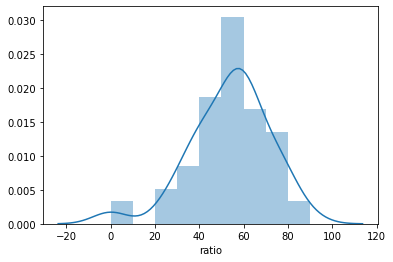

In [145]:
sb.distplot(frame['ratio'])

In [147]:
pl_rat = frame.drop_duplicates(subset=['Player'])

pl_rat['Player'].value_counts()

AG Murtaza         1
GJ Maxwell         1
SS Tiwary          1
DJ Bravo           1
JEC Franklin       1
MG Johnson         1
J Suchith          1
DS Kulkarni        1
CJ Anderson        1
TL Suman           1
R McLaren          1
RE Levi            1
AJ Finch           1
MJ McClenaghan     1
RG Sharma          1
R Sathish          1
AS Yadav           1
Ishan Kishan       1
Q de Kock          1
AM Nayar           1
DR Smith           1
LMP Simmons        1
KA Pollard         1
R Dhawan           1
DJ Jacobs          1
S Gopal            1
HH Pandya          1
ST Jayasuriya      1
MEK Hussey         1
C Nanda            1
SR Tendulkar       1
UBT Chand          1
A Symonds          1
KD Karthik         1
KH Pandya          1
M Markande         1
RV Uthappa         1
AT Rayudu          1
SM Pollock         1
SL Malinga         1
Harbhajan Singh    1
MK Pandey          1
JP Duminy          1
AM Rahane          1
RR Raje            1
PA Patel           1
BCJ Cutting        1
YV Takawale  

In [148]:
pl_rat

,Player,Batsman_run,Boundary_run,ratio
37,CJ Anderson,40,36.0,90.000000
41,S Gopal,70,58.0,82.857143
33,PP Ojha,23,18.0,78.260870
11,JP Duminy,23,18.0,78.260870
10,AM Rahane,23,18.0,78.260870
42,J Suchith,50,38.0,76.000000
25,AG Murtaza,29,22.0,75.862069
40,UBT Chand,95,72.0,75.789474
24,A Symonds,64,48.0,75.000000
51,Q de Kock,39,28.0,71.794872


In [150]:
pl_rat = pl_rat.sort_values(by = 'ratio' ,ascending = False)
pl_rat = pl_rat[['Player' , 'ratio']]
pl_rat

,Player,ratio
37,CJ Anderson,90.000000
41,S Gopal,82.857143
33,PP Ojha,78.260870
11,JP Duminy,78.260870
10,AM Rahane,78.260870
42,J Suchith,76.000000
25,AG Murtaza,75.862069
40,UBT Chand,75.789474
24,A Symonds,75.000000
51,Q de Kock,71.794872


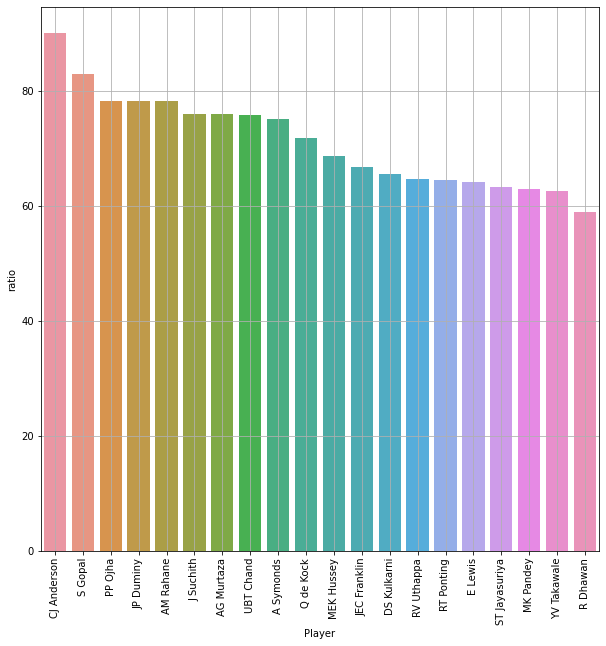

In [152]:
plt.figure(figsize = (10,10))
sb.barplot(pl_rat['Player'][:20] , pl_rat['ratio'][:20])
plt.xticks(rotation = 90)
plt.grid()
plt.show()

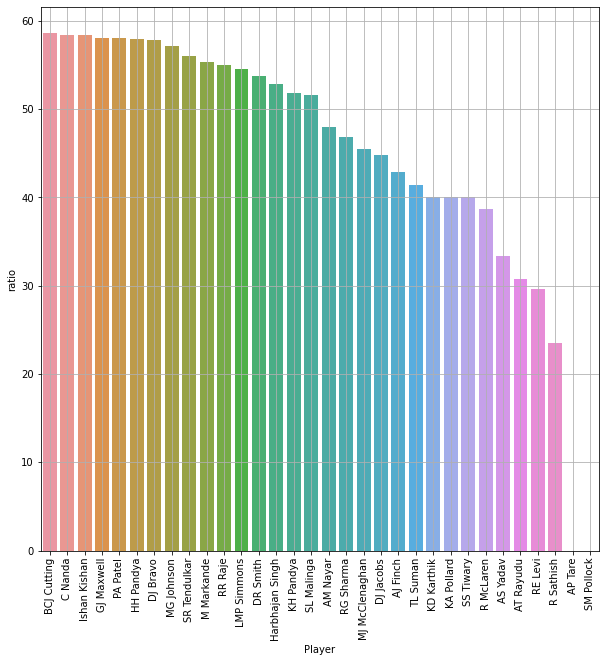

In [153]:
plt.figure(figsize = (10,10))
sb.barplot(pl_rat['Player'][20:] , pl_rat['ratio'][20:])
plt.xticks(rotation = 90)
plt.grid()
plt.show()

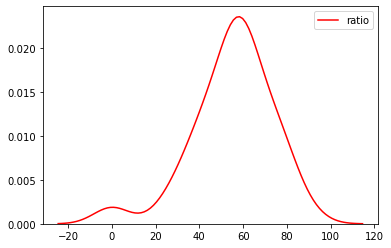

In [155]:
sb.kdeplot(pl_rat['ratio'] , color = 'red')

# Take Aways:
### 1 - There are many good players , but Quinton(70%) , Ishan Kishan(58 %) , HH Pandya , Pollard take the charge
### 2 - The highest boundary ratio/ total runs will be from MI

# Ques 3 ans - Quinton or Samson

In [148]:
##################################################################################################################################

# Ques 4  - Extra ball for 100 ?

In [164]:
raj = main_df_team[main_df_team['batting_team'] == 'Rajasthan Royals']
raj

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
20024,86,1,Rajasthan Royals,Mumbai Indians,1,1,GC Smith,SA Asnodkar,SM Pollock,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
20025,86,1,Rajasthan Royals,Mumbai Indians,1,2,GC Smith,SA Asnodkar,SM Pollock,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
20026,86,1,Rajasthan Royals,Mumbai Indians,1,3,SA Asnodkar,GC Smith,SM Pollock,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
20027,86,1,Rajasthan Royals,Mumbai Indians,1,4,GC Smith,SA Asnodkar,SM Pollock,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
20028,86,1,Rajasthan Royals,Mumbai Indians,1,5,GC Smith,SA Asnodkar,SM Pollock,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173493,11327,2,Rajasthan Royals,Mumbai Indians,19,3,SPD Smith,STR Binny,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173494,11327,2,Rajasthan Royals,Mumbai Indians,19,4,STR Binny,SPD Smith,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173495,11327,2,Rajasthan Royals,Mumbai Indians,19,5,SPD Smith,STR Binny,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173496,11327,2,Rajasthan Royals,Mumbai Indians,19,6,STR Binny,SPD Smith,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [181]:
# 100 runs count for raj team
match = raj['match_id'].unique()
tot , ball , mat = [],[],[]
for i in match:
    m = raj[raj['match_id'] == i]
    m = m.reset_index(drop = True)
    total_runs = 0
    c = 0
    for j in range(len(m)):
        if total_runs <= 100:
            total_runs = total_runs + m.loc[j , 'total_runs']
            c = c+1
        
    tot.append(total_runs)
    ball.append(c)
    mat.append(i)

In [185]:
raj_mat = mat
raj_ball = ball
raj_run = tot

In [186]:
mi = main_df_team[main_df_team['batting_team'] == 'Mumbai Indians']
mi

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
20127,86,2,Mumbai Indians,Rajasthan Royals,1,1,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
20128,86,2,Mumbai Indians,Rajasthan Royals,1,2,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
20129,86,2,Mumbai Indians,Rajasthan Royals,1,3,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
20130,86,2,Mumbai Indians,Rajasthan Royals,1,4,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
20131,86,2,Mumbai Indians,Rajasthan Royals,1,5,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173378,11327,1,Mumbai Indians,Rajasthan Royals,20,2,KH Pandya,BCJ Cutting,J Archer,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173379,11327,1,Mumbai Indians,Rajasthan Royals,20,3,BCJ Cutting,KH Pandya,J Archer,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173380,11327,1,Mumbai Indians,Rajasthan Royals,20,4,KH Pandya,BCJ Cutting,J Archer,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173381,11327,1,Mumbai Indians,Rajasthan Royals,20,5,BCJ Cutting,KH Pandya,J Archer,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [187]:
# 100 runs count for raj team
match = mi['match_id'].unique()
tot , ball , mat = [],[],[]
for i in match:
    m = mi[mi['match_id'] == i]
    m = m.reset_index(drop = True)
    total_runs = 0
    c = 0
    for j in range(len(m)):
        if total_runs <= 100:
            total_runs = total_runs + m.loc[j , 'total_runs']
            c = c+1
        
    tot.append(total_runs)
    ball.append(c)
    mat.append(i)

In [188]:
mi_mat = mat
mi_ball = ball
mi_run = tot

In [189]:
mi_mat

[86,
 113,
 160,
 176,
 219,
 267,
 299,
 319,
 377,
 403,
 447,
 456,
 501,
 513,
 526,
 549,
 7914,
 7940,
 11318,
 11327]

In [190]:
raj_mat

[86,
 113,
 160,
 176,
 219,
 267,
 299,
 319,
 377,
 403,
 447,
 456,
 501,
 513,
 526,
 549,
 7914,
 7940,
 11318,
 11327]

In [191]:
mi_ball

[95,
 98,
 96,
 67,
 90,
 124,
 99,
 74,
 75,
 113,
 72,
 76,
 77,
 54,
 98,
 83,
 64,
 76,
 69,
 72]

In [193]:
mi_run

[102,
 103,
 101,
 101,
 101,
 94,
 102,
 101,
 102,
 92,
 101,
 106,
 104,
 102,
 103,
 101,
 101,
 103,
 101,
 102]

In [194]:
comp = pd.DataFrame(list(zip(mi_mat, mi_run , mi_ball , raj_run , raj_ball)), 
               columns =['Match', 'Mi-Total-run' , 'ball-mi','Raj-Total-run','ball-raj']) 
comp

,Match,Mi-Total-run,ball-mi,Raj-Total-run,ball-raj
0,86,102,95,101,93
1,113,103,98,101,104
2,160,101,96,101,81
3,176,101,67,103,70
4,219,101,90,103,103
5,267,94,124,95,110
6,299,102,99,103,65
7,319,101,74,104,76
8,377,102,75,101,88
9,403,92,113,103,72


In [195]:
comp['diff'] = np.abs(comp['ball-mi'] - comp['ball-raj'])

In [196]:
comp

,Match,Mi-Total-run,ball-mi,Raj-Total-run,ball-raj,diff
0,86,102,95,101,93,2
1,113,103,98,101,104,6
2,160,101,96,101,81,15
3,176,101,67,103,70,3
4,219,101,90,103,103,13
5,267,94,124,95,110,14
6,299,102,99,103,65,34
7,319,101,74,104,76,2
8,377,102,75,101,88,13
9,403,92,113,103,72,41


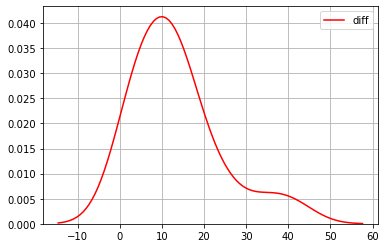

In [199]:
sb.kdeplot(comp['diff'] , color = 'red')
plt.grid()
plt.show()

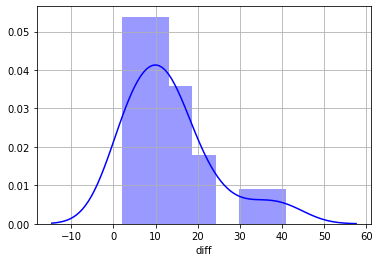

count    20.000000
mean     13.350000
std      10.337846
min       2.000000
25%       6.750000
50%      13.000000
75%      15.250000
max      41.000000
Name: diff, dtype: float64
13.0


In [220]:
sb.distplot(comp['diff'] , color = 'blue')
plt.grid()
plt.show()
print(comp['diff'].describe())
print(comp['diff'].median())

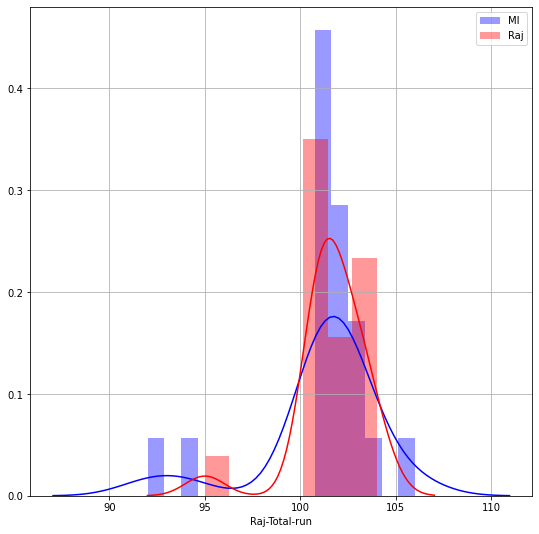

In [211]:
plt.figure(figsize =(9,9))
sb.distplot(comp['Mi-Total-run'] , color = 'blue' , label='MI')
sb.distplot(comp['Raj-Total-run'] , color = 'red' , label = 'Raj')
plt.grid()
plt.legend()
plt.show()

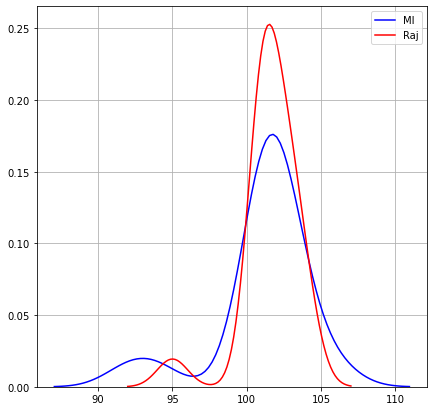

In [213]:
plt.figure(figsize =(7,7))
sb.kdeplot(comp['Mi-Total-run'] , color = 'blue' , label='MI')
sb.kdeplot(comp['Raj-Total-run'] , color = 'red' , label = 'Raj')
plt.grid()
plt.legend()
plt.show()

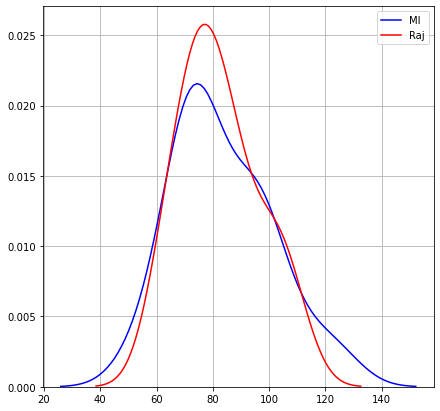

In [214]:
plt.figure(figsize =(7,7))
sb.kdeplot(comp['ball-mi'] , color = 'blue' , label='MI')
sb.kdeplot(comp['ball-raj'] , color = 'red' , label = 'Raj')
plt.grid()
plt.legend()
plt.show()

In [217]:
print(comp['ball-mi'].describe())
print(comp['ball-raj'].describe())
print(comp['ball-mi'].median())
print(comp['ball-raj'].median())


count     20.000000
mean      83.600000
std       17.497067
min       54.000000
25%       72.000000
50%       76.500000
75%       96.500000
max      124.000000
Name: ball-mi, dtype: float64
count     20.000000
mean      82.350000
std       14.027323
min       61.000000
25%       72.750000
50%       79.000000
75%       89.250000
max      110.000000
Name: ball-raj, dtype: float64
76.5
79.0


# Take Aways:
### 1 - There is 4 balls absolute difference between the team for scoring 100
### 2 - MI takes avg of 84 ball to score 100 , and RR takes 82 
### 3 - There will be around 11-15 balls difference for 100

# Ques 4 ans - 11-15

In [1]:
#######################################################################################################################################################

# Ques 5 - Bowler Lethality Score

In [13]:
main_df_team

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
20024,86,1,Rajasthan Royals,Mumbai Indians,1,1,GC Smith,SA Asnodkar,SM Pollock,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
20025,86,1,Rajasthan Royals,Mumbai Indians,1,2,GC Smith,SA Asnodkar,SM Pollock,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
20026,86,1,Rajasthan Royals,Mumbai Indians,1,3,SA Asnodkar,GC Smith,SM Pollock,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
20027,86,1,Rajasthan Royals,Mumbai Indians,1,4,GC Smith,SA Asnodkar,SM Pollock,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
20028,86,1,Rajasthan Royals,Mumbai Indians,1,5,GC Smith,SA Asnodkar,SM Pollock,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173493,11327,2,Rajasthan Royals,Mumbai Indians,19,3,SPD Smith,STR Binny,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173494,11327,2,Rajasthan Royals,Mumbai Indians,19,4,STR Binny,SPD Smith,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173495,11327,2,Rajasthan Royals,Mumbai Indians,19,5,SPD Smith,STR Binny,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
173496,11327,2,Rajasthan Royals,Mumbai Indians,19,6,STR Binny,SPD Smith,JJ Bumrah,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [14]:
main_df_team['player_dismissed'] = main_df_team['player_dismissed'].replace(np.NaN , 0)

In [15]:
rr_bowl = main_df_team[main_df_team['bowling_team'] == 'Rajasthan Royals']
rr_bowl

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
20127,86,2,Mumbai Indians,Rajasthan Royals,1,1,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,0,0,NaN,NaN
20128,86,2,Mumbai Indians,Rajasthan Royals,1,2,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,0,0,NaN,NaN
20129,86,2,Mumbai Indians,Rajasthan Royals,1,3,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,0,0,NaN,NaN
20130,86,2,Mumbai Indians,Rajasthan Royals,1,4,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,1,1,0,NaN,NaN
20131,86,2,Mumbai Indians,Rajasthan Royals,1,5,YV Takawale,ST Jayasuriya,Sohail Tanvir,0,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173378,11327,1,Mumbai Indians,Rajasthan Royals,20,2,KH Pandya,BCJ Cutting,J Archer,0,...,0,0,0,0,1,0,1,0,NaN,NaN
173379,11327,1,Mumbai Indians,Rajasthan Royals,20,3,BCJ Cutting,KH Pandya,J Archer,0,...,0,0,0,0,1,0,1,0,NaN,NaN
173380,11327,1,Mumbai Indians,Rajasthan Royals,20,4,KH Pandya,BCJ Cutting,J Archer,0,...,0,0,0,0,1,0,1,0,NaN,NaN
173381,11327,1,Mumbai Indians,Rajasthan Royals,20,5,BCJ Cutting,KH Pandya,J Archer,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [16]:
rr_bowl['player_dismissed'].unique()

array([0, 'ST Jayasuriya', 'YV Takawale', 'DJ Bravo', 'SR Tendulkar',
       'RV Uthappa', 'AM Nayar', 'SM Pollock', 'MK Pandey', 'DR Smith',
       'AM Rahane', 'JP Duminy', 'DS Kulkarni', 'C Nanda', 'SL Malinga',
       'AP Tare', 'AT Rayudu', 'SS Tiwary', 'R Sathish',
       'Harbhajan Singh', 'KA Pollard', 'DJ Jacobs', 'RG Sharma',
       'A Symonds', 'TL Suman', 'RE Levi', 'KD Karthik', 'JEC Franklin',
       'RT Ponting', 'R Dhawan', 'MG Johnson', 'GJ Maxwell',
       'LMP Simmons', 'MEK Hussey', 'AJ Finch', 'PA Patel', 'UBT Chand',
       'CJ Anderson', 'E Lewis', 'Ishan Kishan', 'AS Yadav', 'KH Pandya',
       'HH Pandya', 'MJ McClenaghan', 'Q de Kock'], dtype=object)

In [19]:
rr_bowl.groupby(['match_id' , 'bowler'])['player_dismissed'].count()

match_id  bowler       
86        MM Patel         19
          SK Trivedi       18
          SK Warne         14
          SR Watson        25
          Sohail Tanvir    23
                           ..
11327     J Archer         24
          JD Unadkat       27
          R Parag          12
          S Gopal          24
          STR Binny        19
Name: player_dismissed, Length: 121, dtype: int64

In [57]:
bowler = rr_bowl['bowler'].unique()

match = rr_bowl['match_id'].unique()

In [86]:
ma , bw , wick = [],[],[]

for i in match:
    ma.append(i)
    m = rr_bowl[rr_bowl['match_id'] == i]
    m = m.reset_index(drop = True)
    for j in bowler:
        
        w = 0
        b = m[m['bowler'] == j]
        b = b.reset_index(drop =True)
        for k in range(len(b)):
            if b.loc[k , 'player_dismissed'] != 0:
                w = w+1
        wick.append(w)
        bw.append(j)
                

In [87]:
ma

[86,
 113,
 160,
 176,
 219,
 267,
 299,
 319,
 377,
 403,
 447,
 456,
 501,
 513,
 526,
 549,
 7914,
 7940,
 11318,
 11327]

In [88]:
bw

['Sohail Tanvir',
 'MM Patel',
 'SK Trivedi',
 'SR Watson',
 'SK Warne',
 'Pankaj Singh',
 'YK Pathan',
 'J Botha',
 'RA Jadeja',
 'AD Mascarenhas',
 'SW Tait',
 'Kamran Khan',
 'A Uniyal',
 'AA Jhunjhunwala',
 'AP Dole',
 'AL Menaria',
 'A Singh',
 'AA Chavan',
 'KK Cooper',
 'GB Hogg',
 'A Chandila',
 'STR Binny',
 'JP Faulkner',
 'PV Tambe',
 'VS Malik',
 'Ankit Sharma',
 'DS Kulkarni',
 'R Bhatia',
 'TG Southee',
 'CH Morris',
 'DJ Hooda',
 'J Theron',
 'K Gowtham',
 'J Archer',
 'JD Unadkat',
 'S Gopal',
 'BA Stokes',
 'L Livingstone',
 'R Parag',
 'Sohail Tanvir',
 'MM Patel',
 'SK Trivedi',
 'SR Watson',
 'SK Warne',
 'Pankaj Singh',
 'YK Pathan',
 'J Botha',
 'RA Jadeja',
 'AD Mascarenhas',
 'SW Tait',
 'Kamran Khan',
 'A Uniyal',
 'AA Jhunjhunwala',
 'AP Dole',
 'AL Menaria',
 'A Singh',
 'AA Chavan',
 'KK Cooper',
 'GB Hogg',
 'A Chandila',
 'STR Binny',
 'JP Faulkner',
 'PV Tambe',
 'VS Malik',
 'Ankit Sharma',
 'DS Kulkarni',
 'R Bhatia',
 'TG Southee',
 'CH Morris',
 'DJ H

In [89]:
wick

[0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 2,
 0,
 3,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [90]:
len(bw) , len(wick)

(780, 780)

In [91]:

bb = pd.DataFrame(list(zip(bw, wick)), 
               columns =['Bowler', 'Wicket']) 
bb

,Bowler,Wicket
0,Sohail Tanvir,0
1,MM Patel,0
2,SK Trivedi,0
3,SR Watson,2
4,SK Warne,1
...,...,...
775,JD Unadkat,1
776,S Gopal,2
777,BA Stokes,0
778,L Livingstone,0


In [92]:
bb['Bowler'].value_counts()

J Botha            20
SW Tait            20
VS Malik           20
GB Hogg            20
S Gopal            20
AP Dole            20
AA Chavan          20
STR Binny          20
A Chandila         20
AD Mascarenhas     20
JD Unadkat         20
BA Stokes          20
SK Warne           20
CH Morris          20
SK Trivedi         20
K Gowtham          20
PV Tambe           20
RA Jadeja          20
Pankaj Singh       20
J Archer           20
YK Pathan          20
Kamran Khan        20
R Parag            20
A Singh            20
J Theron           20
R Bhatia           20
AA Jhunjhunwala    20
SR Watson          20
DS Kulkarni        20
MM Patel           20
KK Cooper          20
Sohail Tanvir      20
TG Southee         20
AL Menaria         20
DJ Hooda           20
L Livingstone      20
Ankit Sharma       20
JP Faulkner        20
A Uniyal           20
Name: Bowler, dtype: int64

In [93]:
w,bo = [],[]
b = bb['Bowler'].unique()
for i in b:
    B = bb[bb['Bowler'] == i]
    B =B.reset_index(drop =True)
    w.append(B['Wicket'].sum())
    bo.append(b)

In [94]:
bo

[array(['Sohail Tanvir', 'MM Patel', 'SK Trivedi', 'SR Watson', 'SK Warne',
        'Pankaj Singh', 'YK Pathan', 'J Botha', 'RA Jadeja',
        'AD Mascarenhas', 'SW Tait', 'Kamran Khan', 'A Uniyal',
        'AA Jhunjhunwala', 'AP Dole', 'AL Menaria', 'A Singh', 'AA Chavan',
        'KK Cooper', 'GB Hogg', 'A Chandila', 'STR Binny', 'JP Faulkner',
        'PV Tambe', 'VS Malik', 'Ankit Sharma', 'DS Kulkarni', 'R Bhatia',
        'TG Southee', 'CH Morris', 'DJ Hooda', 'J Theron', 'K Gowtham',
        'J Archer', 'JD Unadkat', 'S Gopal', 'BA Stokes', 'L Livingstone',
        'R Parag'], dtype=object),
 array(['Sohail Tanvir', 'MM Patel', 'SK Trivedi', 'SR Watson', 'SK Warne',
        'Pankaj Singh', 'YK Pathan', 'J Botha', 'RA Jadeja',
        'AD Mascarenhas', 'SW Tait', 'Kamran Khan', 'A Uniyal',
        'AA Jhunjhunwala', 'AP Dole', 'AL Menaria', 'A Singh', 'AA Chavan',
        'KK Cooper', 'GB Hogg', 'A Chandila', 'STR Binny', 'JP Faulkner',
        'PV Tambe', 'VS Malik', 'Ankit Sh

In [95]:
w

[4,
 4,
 7,
 11,
 7,
 0,
 0,
 4,
 0,
 2,
 2,
 0,
 3,
 0,
 1,
 2,
 5,
 1,
 8,
 2,
 2,
 7,
 9,
 2,
 0,
 3,
 9,
 0,
 2,
 1,
 0,
 1,
 0,
 9,
 5,
 2,
 2,
 0,
 0]

In [96]:
len(w)

39

In [97]:
len(bo[0])

39

In [98]:

bb = pd.DataFrame(list(zip(bo[0], w)), 
               columns =['Bowler', 'Wicket']) 
bb

,Bowler,Wicket
0,Sohail Tanvir,4
1,MM Patel,4
2,SK Trivedi,7
3,SR Watson,11
4,SK Warne,7
5,Pankaj Singh,0
6,YK Pathan,0
7,J Botha,4
8,RA Jadeja,0
9,AD Mascarenhas,2


In [99]:
ma , bw , wick = [],[],[]

for i in match:
    ma.append(i)
    m = rr_bowl[rr_bowl['match_id'] == i]
    m = m.reset_index(drop = True)
    for j in bowler:
        
        w = 0
        b = m[m['bowler'] == j]
        b = b.reset_index(drop =True)
        for k in range(len(b)):
            if b.loc[k , 'batsman_runs'] == 0:
                w = w+1
        wick.append(w)
        bw.append(j)
                

In [100]:
ma , bw , wick

([86,
  113,
  160,
  176,
  219,
  267,
  299,
  319,
  377,
  403,
  447,
  456,
  501,
  513,
  526,
  549,
  7914,
  7940,
  11318,
  11327],
 ['Sohail Tanvir',
  'MM Patel',
  'SK Trivedi',
  'SR Watson',
  'SK Warne',
  'Pankaj Singh',
  'YK Pathan',
  'J Botha',
  'RA Jadeja',
  'AD Mascarenhas',
  'SW Tait',
  'Kamran Khan',
  'A Uniyal',
  'AA Jhunjhunwala',
  'AP Dole',
  'AL Menaria',
  'A Singh',
  'AA Chavan',
  'KK Cooper',
  'GB Hogg',
  'A Chandila',
  'STR Binny',
  'JP Faulkner',
  'PV Tambe',
  'VS Malik',
  'Ankit Sharma',
  'DS Kulkarni',
  'R Bhatia',
  'TG Southee',
  'CH Morris',
  'DJ Hooda',
  'J Theron',
  'K Gowtham',
  'J Archer',
  'JD Unadkat',
  'S Gopal',
  'BA Stokes',
  'L Livingstone',
  'R Parag',
  'Sohail Tanvir',
  'MM Patel',
  'SK Trivedi',
  'SR Watson',
  'SK Warne',
  'Pankaj Singh',
  'YK Pathan',
  'J Botha',
  'RA Jadeja',
  'AD Mascarenhas',
  'SW Tait',
  'Kamran Khan',
  'A Uniyal',
  'AA Jhunjhunwala',
  'AP Dole',
  'AL Menaria',
  '

In [101]:
dot = pd.DataFrame(list(zip(bw, wick)), 
               columns =['Bowler', 'Dot']) 
dot

,Bowler,Dot
0,Sohail Tanvir,17
1,MM Patel,10
2,SK Trivedi,9
3,SR Watson,11
4,SK Warne,7
...,...,...
775,JD Unadkat,4
776,S Gopal,8
777,BA Stokes,0
778,L Livingstone,0


In [102]:
w,bo = [],[]
b = dot['Bowler'].unique()
for i in b:
    B = dot[dot['Bowler'] == i]
    B =B.reset_index(drop =True)
    w.append(B['Dot'].sum())
    bo.append(b)

In [103]:
bo

[array(['Sohail Tanvir', 'MM Patel', 'SK Trivedi', 'SR Watson', 'SK Warne',
        'Pankaj Singh', 'YK Pathan', 'J Botha', 'RA Jadeja',
        'AD Mascarenhas', 'SW Tait', 'Kamran Khan', 'A Uniyal',
        'AA Jhunjhunwala', 'AP Dole', 'AL Menaria', 'A Singh', 'AA Chavan',
        'KK Cooper', 'GB Hogg', 'A Chandila', 'STR Binny', 'JP Faulkner',
        'PV Tambe', 'VS Malik', 'Ankit Sharma', 'DS Kulkarni', 'R Bhatia',
        'TG Southee', 'CH Morris', 'DJ Hooda', 'J Theron', 'K Gowtham',
        'J Archer', 'JD Unadkat', 'S Gopal', 'BA Stokes', 'L Livingstone',
        'R Parag'], dtype=object),
 array(['Sohail Tanvir', 'MM Patel', 'SK Trivedi', 'SR Watson', 'SK Warne',
        'Pankaj Singh', 'YK Pathan', 'J Botha', 'RA Jadeja',
        'AD Mascarenhas', 'SW Tait', 'Kamran Khan', 'A Uniyal',
        'AA Jhunjhunwala', 'AP Dole', 'AL Menaria', 'A Singh', 'AA Chavan',
        'KK Cooper', 'GB Hogg', 'A Chandila', 'STR Binny', 'JP Faulkner',
        'PV Tambe', 'VS Malik', 'Ankit Sh

In [104]:
dot = pd.DataFrame(list(zip(bo[0], w)), 
               columns =['Bowler', 'Dot']) 
dot

,Bowler,Dot
0,Sohail Tanvir,33
1,MM Patel,23
2,SK Trivedi,77
3,SR Watson,96
4,SK Warne,59
5,Pankaj Singh,3
6,YK Pathan,30
7,J Botha,29
8,RA Jadeja,1
9,AD Mascarenhas,7


In [107]:
ma , bw , wick = [],[],[]

for i in match:
    ma.append(i)
    m = rr_bowl[rr_bowl['match_id'] == i]
    m = m.reset_index(drop = True)
    for j in bowler:
        
        w = 0
        b = m[m['bowler'] == j]
        b = b.reset_index(drop =True)
        for k in range(len(b)):
            if (b.loc[k , 'batsman_runs'] == 4) | (b.loc[k , 'batsman_runs'] == 6):
                w = w+1
        wick.append(w)
        bw.append(j)


In [108]:
no_b_runs = pd.DataFrame(list(zip(bw, wick)), 
               columns =['Bowler', 'no-B-Runs']) 
no_b_runs

,Bowler,no-B-Runs
0,Sohail Tanvir,1
1,MM Patel,1
2,SK Trivedi,3
3,SR Watson,3
4,SK Warne,2
...,...,...
775,JD Unadkat,6
776,S Gopal,1
777,BA Stokes,0
778,L Livingstone,0


In [109]:
w,bo = [],[]
b = bb['Bowler'].unique()
for i in b:
    B = no_b_runs[no_b_runs['Bowler'] == i]
    B =B.reset_index(drop =True)
    w.append(B['no-B-Runs'].sum())
    bo.append(b)

In [110]:
cb = pd.DataFrame(list(zip(bo[0], w)), 
               columns =['Bowler', 'boundary-count']) 
cb

,Bowler,boundary-count
0,Sohail Tanvir,2
1,MM Patel,4
2,SK Trivedi,19
3,SR Watson,44
4,SK Warne,16
5,Pankaj Singh,3
6,YK Pathan,7
7,J Botha,9
8,RA Jadeja,3
9,AD Mascarenhas,5


In [112]:
ma , bw , wick = [],[],[]

for i in match:
    ma.append(i)
    m = rr_bowl[rr_bowl['match_id'] == i]
    m = m.reset_index(drop = True)
    for j in bowler:
        
        w = 0
        b = m[m['bowler'] == j]
        b = b.reset_index(drop =True)
        for k in range(len(b)):
            if (b.loc[k , 'batsman_runs'] == 4):
                w = w+4
            elif (b.loc[k , 'batsman_runs'] == 6):
                w = w+6
        wick.append(w)
        bw.append(j)


In [113]:
t_b_runs = pd.DataFrame(list(zip(bw, wick)), 
               columns =['Bowler', 'bound-runs']) 
t_b_runs

,Bowler,bound-runs
0,Sohail Tanvir,4
1,MM Patel,6
2,SK Trivedi,16
3,SR Watson,12
4,SK Warne,8
...,...,...
775,JD Unadkat,30
776,S Gopal,4
777,BA Stokes,0
778,L Livingstone,0


In [114]:
w,bo = [],[]
b = bb['Bowler'].unique()
for i in b:
    B = t_b_runs[t_b_runs['Bowler'] == i]
    B =B.reset_index(drop =True)
    w.append(B['bound-runs'].sum())
    bo.append(b)

In [115]:
br = pd.DataFrame(list(zip(bo[0], w)), 
               columns =['Bowler', 'bound-runs']) 
br

,Bowler,bound-runs
0,Sohail Tanvir,8
1,MM Patel,18
2,SK Trivedi,88
3,SR Watson,192
4,SK Warne,66
5,Pankaj Singh,12
6,YK Pathan,34
7,J Botha,42
8,RA Jadeja,12
9,AD Mascarenhas,20


In [105]:
bls = pd.merge(bb , dot ,  on = 'Bowler',how='inner')

In [111]:
bls = pd.merge(bls , cb ,  on = 'Bowler',how='inner')

In [116]:
bls = pd.merge(bls , br ,  on = 'Bowler',how='inner')

In [117]:
bls

,Bowler,Wicket,Dot,boundary-count,bound-runs
0,Sohail Tanvir,4,33,2,8
1,MM Patel,4,23,4,18
2,SK Trivedi,7,77,19,88
3,SR Watson,11,96,44,192
4,SK Warne,7,59,16,66
5,Pankaj Singh,0,3,3,12
6,YK Pathan,0,30,7,34
7,J Botha,4,29,9,42
8,RA Jadeja,0,1,3,12
9,AD Mascarenhas,2,7,5,20


In [118]:
bls['bls'] = ((bls['Wicket'] + (bls['Dot']*2)) - (bls['bound-runs'] / bls['boundary-count']))/(480 - (bls['Dot']*2.5))

In [119]:
bls

,Bowler,Wicket,Dot,boundary-count,bound-runs,bls
0,Sohail Tanvir,4,33,2,8,0.166038
1,MM Patel,4,23,4,18,0.107692
2,SK Trivedi,7,77,19,88,0.543890
3,SR Watson,11,96,44,192,0.827652
4,SK Warne,7,59,16,66,0.363534
5,Pankaj Singh,0,3,3,12,0.004233
6,YK Pathan,0,30,7,34,0.136155
7,J Botha,4,29,9,42,0.140695
8,RA Jadeja,0,1,3,12,-0.004188
9,AD Mascarenhas,2,7,5,20,0.025946


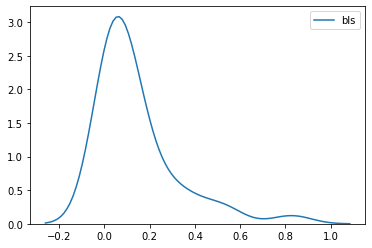

In [120]:
sb.kdeplot(bls['bls'])

In [122]:
bls= bls.sort_values(by = 'bls' , ascending = False)


In [123]:
bls

,Bowler,Wicket,Dot,boundary-count,bound-runs,bls
3,SR Watson,11,96,44,192,0.827652
2,SK Trivedi,7,77,19,88,0.543890
26,DS Kulkarni,9,73,37,172,0.505383
22,JP Faulkner,9,62,33,158,0.394499
4,SK Warne,7,59,16,66,0.363534
18,KK Cooper,8,51,23,110,0.298489
33,J Archer,9,45,11,50,0.257019
17,AA Chavan,1,48,14,66,0.256349
0,Sohail Tanvir,4,33,2,8,0.166038
21,STR Binny,7,30,13,56,0.154796


In [124]:
mi_bowl = main_df_team[main_df_team['bowling_team'] == 'Mumbai Indians']
bowler = mi_bowl['bowler'].unique()

match = mi_bowl['match_id'].unique()

In [128]:
ma , bw , wick = [],[],[]

for i in match:
    ma.append(i)
    m = mi_bowl[mi_bowl['match_id'] == i]
    m = m.reset_index(drop = True)
    for j in bowler:
        
        w = 0
        b = m[m['bowler'] == j]
        b = b.reset_index(drop =True)
        for k in range(len(b)):
            if b.loc[k , 'batsman_runs'] == 0:
                w = w+1
        wick.append(w)
        bw.append(j)
                

In [129]:
len(ma) , len(bw), len(wick)

(20, 780, 780)

In [131]:

dot = pd.DataFrame(list(zip(bw, wick)), 
               columns =['Bowler', 'Dot']) 
w,bo = [],[]
b = dot['Bowler'].unique()
for i in b:
    B = dot[dot['Bowler'] == i]
    B =B.reset_index(drop =True)
    w.append(B['Dot'].sum())
    bo.append(b)
    

dot = pd.DataFrame(list(zip(bo[0], w)), 
               columns =['Bowler', 'Dot']) 
dot

,Bowler,Dot
0,SM Pollock,17
1,A Nehra,23
2,DS Kulkarni,67
3,DJ Bravo,20
4,ST Jayasuriya,11
5,RR Raje,13
6,CRD Fernando,14
7,DR Smith,8
8,AM Nayar,2
9,SL Malinga,127


In [132]:
ma , bw , wick = [],[],[]

for i in match:
    ma.append(i)
    m = mi_bowl[mi_bowl['match_id'] == i]
    m = m.reset_index(drop = True)
    for j in bowler:
        
        w = 0
        b = m[m['bowler'] == j]
        b = b.reset_index(drop =True)
        for k in range(len(b)):
            if (b.loc[k , 'batsman_runs'] == 4) | (b.loc[k , 'batsman_runs'] == 6):
                w = w+1
        wick.append(w)
        bw.append(j)

        

count = pd.DataFrame(list(zip(bw, wick)), 
               columns =['Bowler', 'boundary-count']) 
w,bo = [],[]
b = count['Bowler'].unique()
for i in b:
    B = count[count['Bowler'] == i]
    B =B.reset_index(drop =True)
    w.append(B['boundary-count'].sum())
    bo.append(b)
    

count = pd.DataFrame(list(zip(bo[0], w)), 
               columns =['Bowler', 'boundary-count']) 
count

,Bowler,boundary-count
0,SM Pollock,5
1,A Nehra,5
2,DS Kulkarni,17
3,DJ Bravo,4
4,ST Jayasuriya,6
5,RR Raje,5
6,CRD Fernando,2
7,DR Smith,3
8,AM Nayar,0
9,SL Malinga,49


In [133]:
ma , bw , wick = [],[],[]

for i in match:
    ma.append(i)
    m = mi_bowl[mi_bowl['match_id'] == i]
    m = m.reset_index(drop = True)
    for j in bowler:
        
        w = 0
        b = m[m['bowler'] == j]
        b = b.reset_index(drop =True)
        for k in range(len(b)):
            if (b.loc[k , 'batsman_runs'] == 4):
                w = w+4
            elif (b.loc[k , 'batsman_runs'] == 6):
                w = w+6
        wick.append(w)
        bw.append(j)


In [134]:

runs = pd.DataFrame(list(zip(bw, wick)), 
               columns =['Bowler', 'bound-runs']) 
w,bo = [],[]
b = runs['Bowler'].unique()
for i in b:
    B = runs[runs['Bowler'] == i]
    B =B.reset_index(drop =True)
    w.append(B['bound-runs'].sum())
    bo.append(b)
    

runs = pd.DataFrame(list(zip(bo[0], w)), 
               columns =['Bowler', 'boundary-count']) 
runs

,Bowler,boundary-count
0,SM Pollock,20
1,A Nehra,20
2,DS Kulkarni,78
3,DJ Bravo,20
4,ST Jayasuriya,28
5,RR Raje,22
6,CRD Fernando,10
7,DR Smith,14
8,AM Nayar,0
9,SL Malinga,212


In [135]:
ma , bw , wick = [],[],[]

for i in match:
    ma.append(i)
    m = mi_bowl[mi_bowl['match_id'] == i]
    m = m.reset_index(drop = True)
    for j in bowler:
        
        w = 0
        b = m[m['bowler'] == j]
        b = b.reset_index(drop =True)
        for k in range(len(b)):
            if b.loc[k , 'player_dismissed'] != 0:
                w = w+1
        wick.append(w)
        bw.append(j)
                

In [136]:

wi = pd.DataFrame(list(zip(bw, wick)), 
               columns =['Bowler', 'Wicket']) 
w,bo = [],[]
b = wi['Bowler'].unique()
for i in b:
    B = wi[wi['Bowler'] == i]
    B =B.reset_index(drop =True)
    w.append(B['Wicket'].sum())
    bo.append(b)
    

wi = pd.DataFrame(list(zip(bo[0], w)), 
               columns =['Bowler', 'Wicket']) 
wi

,Bowler,Wicket
0,SM Pollock,1
1,A Nehra,4
2,DS Kulkarni,8
3,DJ Bravo,3
4,ST Jayasuriya,3
5,RR Raje,4
6,CRD Fernando,2
7,DR Smith,0
8,AM Nayar,0
9,SL Malinga,12


In [137]:
bls1 = pd.merge(wi , dot ,  on = 'Bowler',how='inner')
bls1 = pd.merge(bls1 , count ,  on = 'Bowler',how='inner')
bls1 = pd.merge(bls1 , runs ,  on = 'Bowler',how='inner')


In [138]:
bls1

,Bowler,Wicket,Dot,boundary-count_x,boundary-count_y
0,SM Pollock,1,17,5,20
1,A Nehra,4,23,5,20
2,DS Kulkarni,8,67,17,78
3,DJ Bravo,3,20,4,20
4,ST Jayasuriya,3,11,6,28
5,RR Raje,4,13,5,22
6,CRD Fernando,2,14,2,10
7,DR Smith,0,8,3,14
8,AM Nayar,0,2,0,0
9,SL Malinga,12,127,49,212


In [139]:
bls

,Bowler,Wicket,Dot,boundary-count,bound-runs,bls
3,SR Watson,11,96,44,192,0.827652
2,SK Trivedi,7,77,19,88,0.543890
26,DS Kulkarni,9,73,37,172,0.505383
22,JP Faulkner,9,62,33,158,0.394499
4,SK Warne,7,59,16,66,0.363534
18,KK Cooper,8,51,23,110,0.298489
33,J Archer,9,45,11,50,0.257019
17,AA Chavan,1,48,14,66,0.256349
0,Sohail Tanvir,4,33,2,8,0.166038
21,STR Binny,7,30,13,56,0.154796


In [140]:
bls1['bls'] = ((bls1['Wicket'] + (bls1['Dot']*2)) - (bls1['boundary-count_y'] / bls1['boundary-count_x']))/(480 - (bls1['Dot']*2.5))

In [141]:
bls1

,Bowler,Wicket,Dot,boundary-count_x,boundary-count_y,bls
0,SM Pollock,1,17,5,20,0.070857
1,A Nehra,4,23,5,20,0.108876
2,DS Kulkarni,8,67,17,78,0.439718
3,DJ Bravo,3,20,4,20,0.088372
4,ST Jayasuriya,3,11,6,28,0.044936
5,RR Raje,4,13,5,22,0.057207
6,CRD Fernando,2,14,2,10,0.056180
7,DR Smith,0,8,3,14,0.024638
8,AM Nayar,0,2,0,0,NaN
9,SL Malinga,12,127,49,212,1.610298


In [142]:
bls1= bls1.sort_values(by = 'bls' , ascending = False)


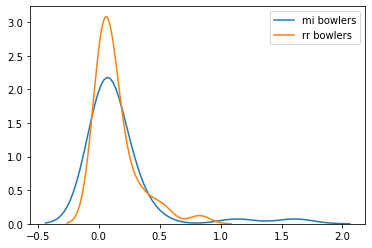

In [145]:
sb.kdeplot(bls1['bls'] , label = 'mi bowlers')
sb.kdeplot(bls['bls'], label = 'rr bowlers')


In [146]:
bls1

,Bowler,Wicket,Dot,boundary-count_x,boundary-count_y,bls
9,SL Malinga,12,127,49,212,1.610298
11,Harbhajan Singh,12,111,39,178,1.133017
2,DS Kulkarni,8,67,17,78,0.439718
24,JJ Bumrah,7,54,18,78,0.320773
17,KA Pollard,11,50,27,128,0.299322
20,PP Ojha,4,49,25,116,0.272336
22,MG Johnson,2,38,15,62,0.191861
18,MM Patel,6,34,10,44,0.176203
31,MJ McClenaghan,4,30,11,50,0.146801
13,Z Khan,4,25,5,22,0.118802


# Take Aways:
### 1 - In MI bowlers , JJ Bumrah leads the BLS with 0.32 ,and in RR Archer with 0.25
### 2 - The winner of today is MI , hence Bumrah will perform better

# Ques 5 ans - Bumrah or Tewatia